In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:

HDB_df=pd.read_csv("HDB.csv")
IBN_df=pd.read_csv("IBN.csv")
Kotak_df=pd.read_csv("KOTAKBANK.csv")
SBI_df=pd.read_csv("SBIN.csv")
BN_df=pd.read_csv("NSEBANK.csv")

df=pd.DataFrame(['Date','BANKNIFTY','HDB',"IBN",'Kotak','SBI'])

df['Date']=BN_df['Date']
bank_nifty_list=BN_df['Close']
hdf=HDB_df['Close']
ibn=IBN_df['Close']
kotak=Kotak_df['Close']
sbi=SBI_df['Close']

In [3]:
df.to_csv("hh.csv")

In [4]:
type(bank_nifty_list)

pandas.core.series.Series

In [5]:

X = pd.DataFrame(np.c_[hdf[:142], ibn[:142],kotak[:142],sbi[:142]], columns=['HDB','IBN','Kotak','SBI'])
Y = bank_nifty_list[:142]
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=9)


           HDB        IBN        Kotak         SBI
0    70.000000  14.440000  1994.050049  279.399994
1    71.540001  14.800000  1965.550049  281.049988
2    70.779999  15.160000  1959.750000  281.750000
3    71.959999  14.890000  1970.400024  285.049988
4    72.910004  14.980000  1952.400024  287.700012
..         ...        ...          ...         ...
137  70.269997  17.520000  1722.949951  428.899994
138  69.589996  17.600000  1740.599976  423.299988
139  69.860001  18.290001  1697.949951  429.950012
140  70.370003  18.360001  1652.849976  425.500000
141  69.779999  18.170000  1641.650024  441.549988

[142 rows x 4 columns]


In [6]:
Y.shape

(142,)

In [7]:
X.shape

(142, 4)

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [9]:
regressor

LinearRegression()

In [10]:
y_pred = regressor.predict(X_test)

In [11]:
y_pred

array([33844.28485368, 34713.26314769, 36040.39579391, 35492.81562897,
       33521.64155456, 33233.76368279, 32057.51084173, 32800.85950898,
       35966.52189421, 33697.78350609, 31366.66715239, 35441.67134653,
       35435.62569606, 35057.1119906 , 30933.18870204, 32347.78930504,
       32979.10875428, 31866.5563105 , 36440.15685675, 33893.20545472,
       31992.99704565, 34778.36384172, 32128.81993965, 36155.74099803,
       34857.07795993, 35489.71360212, 36398.86601574, 34599.60668826,
       33421.08100572])

In [12]:
y_test

53     33603.449219
118    35359.449219
35     35116.949219
109    35247.750000
85     32872.199219
90     33685.199219
76     33722.800781
83     32904.500000
26     35783.101562
20     34267.898438
73     31722.300781
97     35141.449219
47     35496.648438
96     35095.050781
17     30358.300781
8      32519.750000
89     33922.398438
69     31977.449219
31     36910.949219
51     33856.800781
3      31956.000000
39     35296.000000
10     31811.750000
25     36056.500000
114    34745.000000
108    34950.601562
28     36108.898438
115    34574.000000
79     32465.750000
Name: Close, dtype: float64

In [40]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.8814472642870081


In [13]:
y_pred_df=pd.DataFrame({'Actual value':y_test,'Predicited value':y_pred,'difference':y_test-y_pred})
y_pred_df[0:20]

,Actual value,Predicited value,difference
53,33603.449219,33844.284854,-240.835635
118,35359.449219,34713.263148,646.186071
35,35116.949219,36040.395794,-923.446575
109,35247.750000,35492.815629,-245.065629
85,32872.199219,33521.641555,-649.442336
90,33685.199219,33233.763683,451.435536
76,33722.800781,32057.510842,1665.289940
83,32904.500000,32800.859509,103.640491
26,35783.101562,35966.521894,-183.420332
20,34267.898438,33697.783506,570.114931


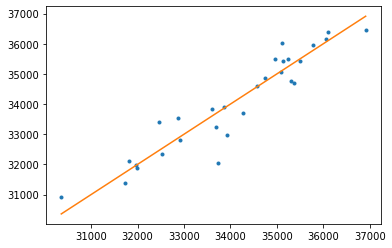

In [17]:
# Visualising the results
plt.plot(y_test,y_pred,'.')
x = np.linspace(min(y_test),max(y_test))
z = x
plt.plot(x, z)

In [28]:

import statsmodels.api as sm
X = np.append(arr = np.ones((142, 1)).astype(int), values = X, axis = 1)

X_Optimal = X[:, [0,1,2,3]]
regressor_OLS = sm.OLS(endog = Y, exog = X_Optimal).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 19 Aug 2021   Prob (F-statistic):                nan
Time:                        11:18:02   Log-Likelihood:                -1248.7
No. Observations:                 142   AIC:                             2499.
Df Residuals:                     141   BIC:                             2502.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8523.8708     33.587    253.783      0.000    8457.471    8590.271
x1          8523.8708     33.587    253.783      0.000    8457.471    8590.271
x2          8523.8708     33.587    253.783      0.000    8457.471    8590.271
x3          8523.8708     33.587    253.783      0.000    8457.471    8590.271
==============================================================================
Omnibus:                       12.075   Durbin-Watson:                   0.119
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                7.832
Skew:                          -0.432   Prob(JB):                       0.0199
Kurtosis:                       2.240   Cond. No.                     1.24e+49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.71e-96. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
X_Optimal = X[:, [0,1,2,4,5]]
regressor_OLS = sm.OLS(endog = Y, exog = X_Optimal).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     69.55
Date:                Thu, 19 Aug 2021   Prob (F-statistic):           6.32e-14
Time:                        11:20:04   Log-Likelihood:                -1220.1
No. Observations:                 142   AIC:                             2444.
Df Residuals:                     140   BIC:                             2450.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4480.1097    485.663      9.225      0.000    3519.928    5440.292
x1          4480.1097    485.663      9.225      0.000    3519.928    5440.292
x2          4480.1097    485.663      9.225      0.000    3519.928    5440.292
x3          4480.1097    485.663      9.225      0.000    3519.928    5440.292
x4           214.7422     25.749      8.340      0.000     163.834     265.650
==============================================================================
Omnibus:                       14.496   Durbin-Watson:                   0.221
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                6.321
Skew:                          -0.278   Prob(JB):                       0.0424
Kurtosis:                       2.128   Cond. No.                     4.08e+34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.86e-64. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [30]:
X_Optimal = X[:, [0,1,4,5]]
regressor_OLS = sm.OLS(endog = Y, exog = X_Optimal).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     69.55
Date:                Thu, 19 Aug 2021   Prob (F-statistic):           6.32e-14
Time:                        11:20:28   Log-Likelihood:                -1220.1
No. Observations:                 142   AIC:                             2444.
Df Residuals:                     140   BIC:                             2450.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5973.4796    647.551      9.225      0.000    4693.237    7253.722
x1          5973.4796    647.551      9.225      0.000    4693.237    7253.722
x2          5973.4796    647.551      9.225      0.000    4693.237    7253.722
x3           214.7422     25.749      8.340      0.000     163.834     265.650
==============================================================================
Omnibus:                       14.496   Durbin-Watson:                   0.221
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                6.321
Skew:                          -0.278   Prob(JB):                       0.0424
Kurtosis:                       2.128   Cond. No.                     1.35e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.45e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [31]:
X_Optimal = X[:, [0,1,4]]
regressor_OLS = sm.OLS(endog = Y, exog = X_Optimal).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 19 Aug 2021   Prob (F-statistic):                nan
Time:                        11:20:47   Log-Likelihood:                -1248.7
No. Observations:                 142   AIC:                             2499.
Df Residuals:                     141   BIC:                             2502.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.137e+04     44.783    253.783      0.000    1.13e+04    1.15e+04
x1          1.137e+04     44.783    253.783      0.000    1.13e+04    1.15e+04
x2          1.137e+04     44.783    253.783      0.000    1.13e+04    1.15e+04
==============================================================================
Omnibus:                       12.075   Durbin-Watson:                   0.119
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                7.832
Skew:                          -0.432   Prob(JB):                       0.0199
Kurtosis:                       2.240   Cond. No.                     3.06e+32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.55e-63. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [38]:
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))
rms

542.7815236350907

In [33]:
# Fitting the Multiple Linear Regression in the Optimal Training set

X_Optimal_Train, X_Optimal_Test, = train_test_split(X_Optimal,test_size = 0.2, random_state = 0)
regressor.fit(X_Optimal_Train, y_train)

# Predicting the Optimal Test set results

Y_Optimal_Pred = regressor.predict(X_Optimal_Test)

In [34]:
Y_Optimal_Pred

array([34106.45780904, 34106.45780904, 34106.45780904, 34106.45780904,
       34106.45780904, 34106.45780904, 34106.45780904, 34106.45780904,
       34106.45780904, 34106.45780904, 34106.45780904, 34106.45780904,
       34106.45780904, 34106.45780904, 34106.45780904, 34106.45780904,
       34106.45780904, 34106.45780904, 34106.45780904, 34106.45780904,
       34106.45780904, 34106.45780904, 34106.45780904, 34106.45780904,
       34106.45780904, 34106.45780904, 34106.45780904, 34106.45780904,
       34106.45780904])

In [36]:
y_pred_df=pd.DataFrame({'Actual value':y_test,'Predicited value':Y_Optimal_Pred,'difference':y_test-Y_Optimal_Pred})
y_pred_df[0:20]

,Actual value,Predicited value,difference
53,33603.449219,34106.457809,-503.008590
118,35359.449219,34106.457809,1252.991410
35,35116.949219,34106.457809,1010.491410
109,35247.750000,34106.457809,1141.292191
85,32872.199219,34106.457809,-1234.258590
90,33685.199219,34106.457809,-421.258590
76,33722.800781,34106.457809,-383.657028
83,32904.500000,34106.457809,-1201.957809
26,35783.101562,34106.457809,1676.643753
20,34267.898438,34106.457809,161.440628


In [37]:
# Predicting the Test set results
y_pred = regressorr.predict(X_Optimal_Test)
plt.plot(Y_Optimal_Pred, y_pred)
plt.plot(y_test, y_pred1)


NameError: name 'regressorr' is not defined

In [ ]:

y_true = y_test.tolist()
y_pred2 = y_pred1.tolist()

r2_score(y_true, y_pred2)

mean_absolute_error(y_true, y_pred2)

mean_squared_error(y_true, y_pred2)

mean_squared_log_error(y_true, y_pred2) 

median_absolute_error(y_true, y_pred2)